In [17]:
# url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/diabetes.csv'
# !wget -X diabetes.csv https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/diabetes.csv

In [18]:
import pandas as pd
import numpy as np
import sklearn
import autosklearn
from sklearn.model_selection import train_test_split
from autosklearn.classification import AutoSklearnClassifier

In [19]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
has_zero_observation = (df['BloodPressure'] == 0) | (df['Glucose'] == 0) | (df['BMI'] == 0)
print(f"Number of rows that will be removed: {has_zero_observation.sum()}")
diabetes = df[~has_zero_observation]
num_rows, num_cols = diabetes.shape
print(f"num_rows: {num_rows}, num_cols: {num_cols}")

Number of rows that will be removed: 44
num_rows: 724, num_cols: 9


In [21]:
y = diabetes['Outcome']
X = diabetes.drop(['Outcome'], axis='columns')


In [22]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Number of training examples: {X_train.shape[0]}, number of features {X_train.shape[1]}")
print(f"Number of test examples: {X_test.shape[0]}")

Number of training examples: 506, number of features 8
Number of test examples: 218


In [24]:
def get_and_fit_model(X_train, y_train, dataset_name, time_left_for_this_task=30, per_run_time_limit=10):
  model = AutoSklearnClassifier(
    # time_left_for_this_task=30,
    # per_run_time_limit=10
    time_left_for_this_task=time_left_for_this_task,
    per_run_time_limit=per_run_time_limit
  )
  model.fit(X_train, y_train, dataset_name=dataset_name)
  return model

In [25]:
model = get_and_fit_model(X_train, y_train, dataset_name="HeartFailure", time_left_for_this_task=120, per_run_time_limit=30)

In [26]:
print(model.sprint_statistics())

auto-sklearn results:
  Dataset name: HeartFailure
  Metric: accuracy
  Best validation score: 0.808383
  Number of target algorithm runs: 38
  Number of successful target algorithm runs: 38
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



In [27]:
def get_scores_and_predictions(model, X_train, y_train, X_test, y_test):
  training_score = model.score(X_train, y_train)
  testing_score = model.score(X_test, y_test)
  predictions = model.predict(X_test)
  predictions_probas = model.predict_proba(X_test)
  return training_score, testing_score, predictions, predictions_probas

In [28]:
training_score, testing_score, predictions, predictions_probas = get_scores_and_predictions(model, X_train, y_train, X_test, y_test)
print("training_score: {training_score}".format(training_score=training_score))
print("testing_score: {testing_score}".format(testing_score=testing_score))
# print("predictions: {predictions}".format(predictions=predictions))
# print("predictions_probas: {predictions_probas}".format(predictions_probas=predictions_probas))

training_score: 0.8774703557312253
testing_score: 0.7522935779816514


In [29]:
accuracy_score=sklearn.metrics.accuracy_score(y_test, predictions)
print(accuracy_score)
precision_score=sklearn.metrics.precision_score(y_test, predictions)
print(precision_score)

0.7522935779816514
0.6229508196721312


Numerical values of the confusion matrix
[[126  23]
 [ 31  38]]
**************************************************


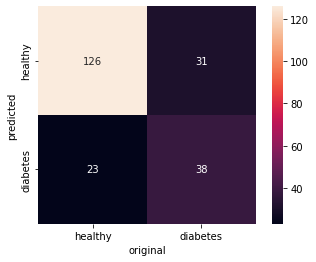

In [30]:
# show confusion matrix
from sklearn.metrics import confusion_matrix

#Matplotlib is a Python visualization library
import matplotlib.pyplot as plt

#Set matplotlib visualization style
# plt.style.use('classic')

# specifiy matplotlib graphs are shown "inline" in the ouput
# %matplotlib inline

# Seabonr is  a Python data visualization library based on matplotlib
import seaborn as sns
# sns.set()

matrix = confusion_matrix(y_test, predictions)
print("Numerical values of the confusion matrix")
print(matrix)
print("*"*50)
labels = ['healthy', 'diabetes']  # keep the alphanumeric order of the original class labels!
sns.heatmap(matrix.T,square=True, annot=True, fmt='d', cbar=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('original')
plt.ylabel('predicted');